   np algorithm  Avg Latency(us)  Min Latency(us)  Max Latency(us)  Iterations
0   2   default             0.25             0.25             0.25       10000
1   4   default             0.74             0.74             0.75       10000
2   6   default             0.89             0.89             0.89       10000
3   8   default             0.95             0.95             0.95       10000
4  10   default             1.53             1.53             1.54       10000
Index(['np', 'algorithm', 'Avg Latency(us)', 'Min Latency(us)',
       'Max Latency(us)', 'Iterations'],
      dtype='object')


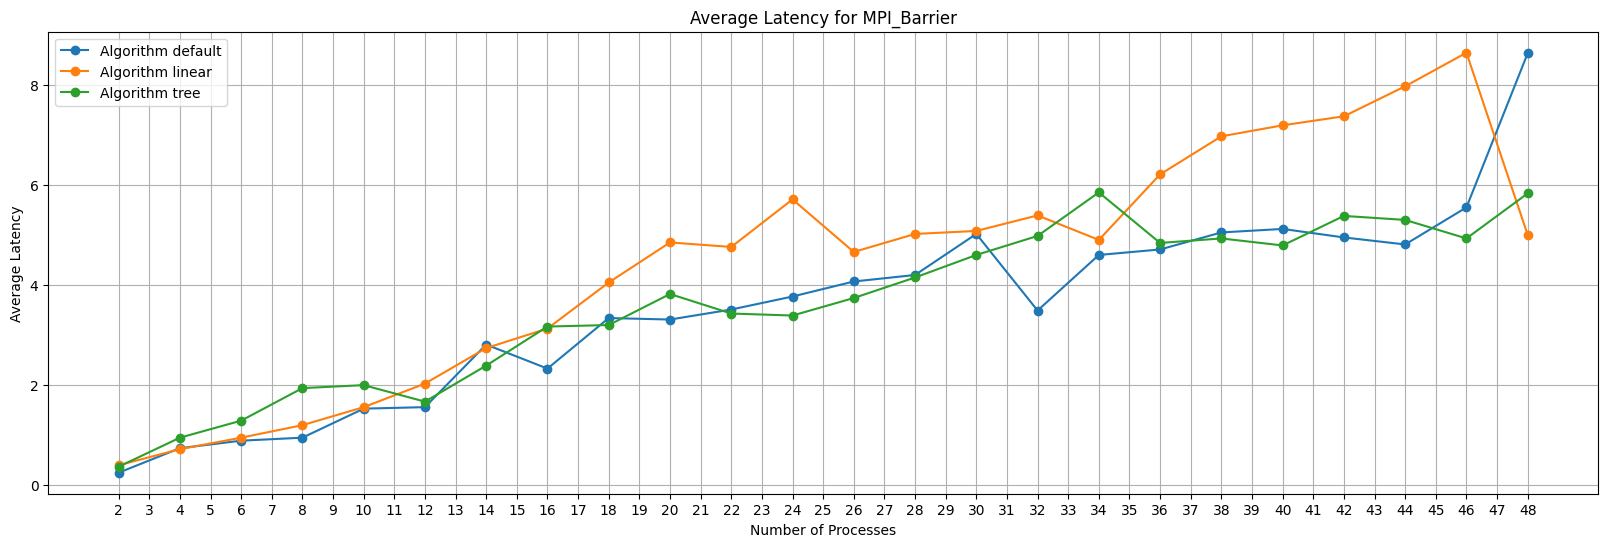

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'barrier_results.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
print(data.head())
print(data.columns)

# Assuming the file contains 'np', 'Avg Latency(us)', and 'algorithm' columns
if 'np' in data.columns and 'Avg Latency(us)' in data.columns and 'algorithm' in data.columns:
    # Calculate the average latency for each combination of number of processes and algorithm
    barrier_avg_latency = data.groupby(['np', 'algorithm'])['Avg Latency(us)'].mean().reset_index()

    # Plot the average latency for MPI_Barrier
    plt.figure(figsize=(20, 6))  # Increased width from 10 to 20 inches
    for algorithm in barrier_avg_latency['algorithm'].unique():
        subset = barrier_avg_latency[barrier_avg_latency['algorithm'] == algorithm]
        plt.plot(subset['np'], subset['Avg Latency(us)'], marker='o', label=f'Algorithm {algorithm}')
    
    plt.title('Average Latency for MPI_Barrier')
    plt.xlabel('Number of Processes')
    plt.ylabel('Average Latency')  # Corrected the units to microseconds (us)
    plt.legend()
    plt.grid(True)
    
    # Set x-axis to show all numbers of processes
    plt.xticks(range(barrier_avg_latency['np'].min(), barrier_avg_latency['np'].max() + 1))
    
    plt.savefig('barrier_avg_latency.png')
    plt.show()
else:
    print("The required columns 'np', 'Avg Latency(us)', and 'algorithm' are not present in the CSV file.")
